In [1]:
import numpy as np
import random

class RRT:
    def __init__(self, start, sampling_func, collision_check_func, step_size=2):
        self.vertices = [start]
        self.edges = []
        self.sampling_func = sampling_func
        self.collision_check_func = collision_check_func
        self.step_size = step_size

    def extend(self):
        new_point = self.sampling_func()
        nearest_vertex_idx = self.nearest_vertex(new_point)
        nearest_vertex = self.vertices[nearest_vertex_idx]

        direction = np.array(new_point) - np.array(nearest_vertex)
        norm = np.linalg.norm(direction)
        if norm > self.step_size:
            direction = (direction / norm) * self.step_size
            new_vertex = nearest_vertex + direction
        else:
            new_vertex = new_point

        if not self.collision_check_func(nearest_vertex, new_vertex):
            self.vertices.append(new_vertex)
            self.edges.append((nearest_vertex_idx, len(self.vertices) - 1))
            return True
        return False

    def nearest_vertex(self, point):
        distances = [np.linalg.norm(np.array(point) - np.array(v)) for v in self.vertices]
        return np.argmin(distances)

    def generate_path(self, goal, max_iter=10000):
        for _ in range(max_iter):
            if self.extend():
                if np.linalg.norm(np.array(self.vertices[-1]) - np.array(goal)) < self.step_size:
                    self.vertices.append(goal)
                    self.edges.append((len(self.vertices) - 2, len(self.vertices) - 1))
                    return self.vertices, self.edges
        return None

# Example usage:
def sample():
    return [random.uniform(0, 10), random.uniform(0, 10), random.uniform(0, 10)]

def collision_check(node1, node2):
    # Placeholder collision check function, replace this with your own collision checking logic
    return False

start_node = [0, 0, 0]
goal_node = [
    10, 10, 10]

rrt = RRT(start_node, sample, collision_check)

path = rrt.generate_path(goal_node)
if path:
    print("Path found!")
    vertices, edges = path
    print("Vertices:", vertices)
    print("Edges:", edges)
else:
    print("Path not found within max iterations.")


Path found!
Vertices: [[0, 0, 0], array([1.22277291, 0.28639668, 1.55653569]), array([2.46952097, 0.91517667, 2.98840684]), array([4.40457932, 1.41614479, 2.92073029]), array([2.05852741, 2.85255815, 3.26704153]), [1.9641120494799003, 1.0295099066613134, 4.061781512977155], array([5.82819794, 2.70064496, 3.48938601]), array([7.25771292, 2.00041186, 2.27853484]), [4.72122855109807, 3.969438845689436, 2.6024380173686943], [8.043453403503573, 2.543928038796067, 3.020723482427603], array([5.19030581, 5.0621796 , 4.21050648]), [5.570549576231683, 4.316639183521415, 1.2973964797593185], array([3.54475311, 5.48963373, 2.05024868]), array([4.66344832, 6.3763172 , 5.62311526]), [4.757666664961574, 6.097411136098739, 3.1676020805376215], array([7.30326165, 5.27902623, 1.02996417]), array([6.45537326, 6.56102754, 6.49195766]), array([4.29183592, 7.05511286, 7.46733343]), array([8.74799335, 6.524911  , 1.63039856]), [5.798364767839146, 7.138174339353349, 3.243031452684372], [5.980272759774964, 4.9

Path found!
[1, 2, 3, 6, 8, 10, 13, 16, 26, 34, 38, 61, 68, 128, 129]
[1.22277291 0.28639668 1.55653569]
[2.46952097 0.91517667 2.98840684]
[4.40457932 1.41614479 2.92073029]
[5.82819794 2.70064496 3.48938601]
[4.72122855109807, 3.969438845689436, 2.6024380173686943]
[5.19030581 5.0621796  4.21050648]
[4.66344832 6.3763172  5.62311526]
[6.45537326 6.56102754 6.49195766]
[6.509263539172409, 6.468785532712278, 8.207332749690817]
[8.3710579  5.75115121 8.34416383]
[9.36344377 5.809131   6.60870751]
[9.12698019 7.78354917 6.39479663]
[8.991551281862924, 7.561042321804228, 8.091661101569061]
[9.41506982 8.90546795 9.5105169 ]
[10, 10, 10]


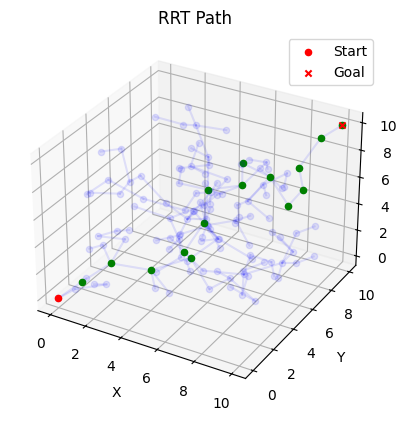

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def get_shortest_path (edges):
    indices = [edges[-1][1]]
    next = edges[-1][0]
    while next != 0:
    #for i in range(30):
        indices.append(next)
        new_edge = np.where(np.array(edges)[:,1] == next)[0][0]
        
        next = edges[new_edge][0]
    
    indices.reverse()

    return indices
    

def plot_path(vertices, edges, start, goal, obstacles = None):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot unused vertices and edges
    for vertex in vertices:
        ax.scatter(vertex[0], vertex[1], vertex[2], color='b', alpha=0.1)  # Unused nodes
    for i, edge in enumerate(edges):
        start_vertex = vertices[edge[0]]
        end_vertex = vertices[edge[1]]
        ax.plot([start_vertex[0], end_vertex[0]], [start_vertex[1], end_vertex[1]], [start_vertex[2], end_vertex[2]], color='b', alpha=0.1)  # Unused edges

    # Plot path vertices and edges
    short_path_indices = get_shortest_path(edges=edges)
    print(short_path_indices)
    for index in short_path_indices:
        print(vertices[index])
        ax.scatter(vertices[index][0], vertices[index][1], vertices[index][2], color="g")

    # Plot start and goal
    ax.scatter(start[0], start[1], start[2], color='r', marker='o', label='Start')
    ax.scatter(goal[0], goal[1], goal[2], color='r', marker='x', label='Goal')

    if obstacles is not None:
        ax.scatter(obstacles[:, 0], obstacles[:, 1], obstacles[:, 2], color='grey',
                   label='Obstacle', s = 22, alpha = 0.5)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.title('RRT Path')
    plt.legend()
    plt.show()

# Example usage:
if path:
    print("Path found!")
    vertices, edges = path
    path_edges = set(edges)
    plot_path(vertices, edges, start_node, goal_node)
else:
    print("Path not found within max iterations.")


# Now with objects from scene

In [3]:
import mujoco
model = mujoco.MjModel.from_xml_path("universal_robots_ur5e/scene.xml")
data = mujoco.MjData(model)
mujoco.mj_step(model,data)

In [4]:
obstacles = data.xpos[8:]

In [5]:
obstacles

array([[ 0.4 ,  0.6 ,  0.  ],
       [-0.4 ,  0.4 ,  0.2 ],
       [-0.3 , -0.6 ,  0.5 ],
       [ 0.2 , -0.6 ,  0.8 ],
       [ 0.4 ,  0.5 ,  0.8 ],
       [-0.5 ,  0.4 ,  0.7 ],
       [ 0.4 ,  0.  ,  0.7 ],
       [-0.4 ,  0.  ,  0.4 ],
       [ 0.  , -0.35,  0.3 ],
       [ 3.4 ,  3.2 ,  3.  ]])

In [6]:
def collision_check_mj(point, obstacles, r=0.1):
    collision = False
    for obstacle in obstacles:
        if np.linalg.norm(point - obstacle, ord=2) < r:
            collision = True
    return collision

In [7]:
def random_points_half_sphere():
    # Generate random theta and phi angles
    theta = np.random.uniform(0, np.pi/2)
    phi = np.random.uniform(0, 2*np.pi)

    # Convert spherical coordinates to Cartesian coordinates
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)

    return x, y, z


start_node = [-0.234, 0.813, 0.0399]
goal_node = [
    0.5, -.5, 0.5]

rrt = RRT(start_node, random_points_half_sphere, collision_check_mj, step_size=0.2)

path = rrt.generate_path(goal_node)
if path:
    print("Path found!")
    vertices, edges = path
    print("Vertices:", vertices)
    print("Edges:", edges)
else:
    print("Path not found within max iterations.")

Path found!
Vertices: [[-0.234, 0.813, 0.0399], array([-0.33300969,  0.66484355,  0.1307116 ]), array([-0.09097211,  0.81628001,  0.17965788]), array([0.01331298, 0.65781566, 0.24301139]), array([-0.46459624,  0.53820936,  0.21225154]), array([0.11423628, 0.51779233, 0.34404582]), array([-0.5961999 ,  0.42661399,  0.31337992]), array([0.13822604, 0.36429541, 0.46999496]), array([0.28491042, 0.36676137, 0.60592734]), array([-0.70239434,  0.55255293,  0.42679123]), array([-0.61197317,  0.23249054,  0.3588474 ]), array([0.4294549 , 0.44498972, 0.49196587]), array([0.20790584, 0.32613482, 0.78598228]), array([-0.761667  ,  0.13051154,  0.4436533 ]), (-0.8048544654699219, 0.2947859352412937, 0.5150830435930134), array([0.09949289, 0.17819319, 0.86573129]), array([ 0.11001941, -0.01758468,  0.82623169]), (0.22812410311112724, 0.29598177667883263, 0.9275527917341339), array([-0.02270064, -0.10765271,  0.94570193]), array([0.06486794, 0.4653542 , 0.77340748]), (-0.048281439603711576, -0.051264

[2, 3, 5, 7, 8, 12, 15, 16, 18, 21, 23, 27, 29, 36, 37]
[-0.09097211  0.81628001  0.17965788]
[0.01331298 0.65781566 0.24301139]
[0.11423628 0.51779233 0.34404582]
[0.13822604 0.36429541 0.46999496]
[0.28491042 0.36676137 0.60592734]
[0.20790584 0.32613482 0.78598228]
[0.09949289 0.17819319 0.86573129]
[ 0.11001941 -0.01758468  0.82623169]
[-0.02270064 -0.10765271  0.94570193]
[ 0.00985419 -0.28768688  0.86490663]
[ 0.20910191 -0.30396835  0.85896892]
[ 0.35090693 -0.32933785  0.72023275]
[ 0.33033741 -0.50779201  0.63230659]
[ 0.3874185  -0.60850985  0.46921868]
[0.5, -0.5, 0.5]


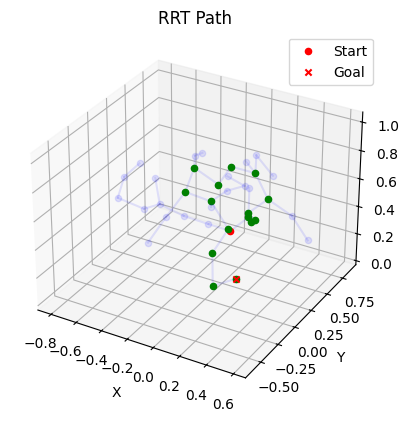

In [8]:
plot_path(vertices, edges, start_node, goal_node)

# But shouldn't we consider also the arm and not only the endeffector?

To do that build a model of the kinematics for the UR5

In [9]:
import numpy as np
from scipy.optimize import minimize

def inverse_kinematics(target_pose, initial_guess):
    """
    Compute the inverse kinematics for the robotic arm given a target end-effector pose.

    Args:
    target_pose (numpy.ndarray): The target end-effector pose as a 4x4 homogeneous transformation matrix.
    initial_guess (numpy.ndarray): Initial guess for the joint angles.

    Returns:
    numpy.ndarray: Joint angles that achieve the desired end-effector pose.
    """
    def objective_function(q):
        # Compute forward kinematics using the current joint angles
        current_pose = forward_kinematics(joint_to_dh(q))[-1]
        # Compute the error between current and target end-effector pose
        error = np.linalg.norm(current_pose - target_pose)
        return error

    # Optimize the objective function to find joint angles
    result = minimize(objective_function, initial_guess, method='SLSQP')
    return result.x


def joint_to_dh(q):
    dh_params = [
    (q[0]-np.pi/2, 0.1625, 0, np.pi/2),    # Joint 1
    (q[1], 0, -0.425, 0),           # Joint 2
    (q[2], 0, -0.3922, 0),          # Joint 3
    (q[3], 0.1333, 0, np.pi/2),     # Joint 4
    (q[4], 0.0997, 0, -np.pi/2),    # Joint 5
    (q[5], 0.0996, 0, 0),           # Joint 6
    ]
    return dh_params

def dh_matrix(theta, d, a, alpha):
    """
    Compute the Denavit-Hartenberg (DH) matrix for a single joint.

    Args:
    theta (float): The joint angle in radians.
    d (float): The joint offset along the previous z-axis.
    a (float): The length of the common normal (link length).
    alpha (float): The twist angle about the common normal.

    Returns:
    numpy.ndarray: The DH matrix representing the transformation from the previous coordinate system to the current one.
    """
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)

    dh_matrix = np.array([
        [cos_theta, -sin_theta*cos_alpha, sin_theta*sin_alpha, a*cos_theta],
        [sin_theta, cos_theta*cos_alpha, -cos_theta*sin_alpha, a*sin_theta],
        [0, sin_alpha, cos_alpha, d],
        [0, 0, 0, 1]
    ])

    return dh_matrix

def forward_kinematics(dh_params):
    """
    Compute the forward kinematics for the robotic arm using DH parameters.

    Args:
    dh_params (list of tuples): List of DH parameters for each joint.

    Returns:
    numpy.ndarray: Homogeneous transformation matrices for each joint and the end-effector.
    """
    # Initialize identity matrix for the base frame
    T = np.eye(4)

    # List to store transformation matrices for each joint
    transformations = []

    for theta, d, a, alpha in dh_params:
        # Compute DH matrix for current joint
        dh_matrix_current = dh_matrix(theta, d, a, alpha)
        # Multiply the transformation matrices
        T = np.dot(T, dh_matrix_current)
        # Store the transformation matrix for this joint
        transformations.append(T)

    return transformations

In [10]:
def collision_check_mj2(point, obstacles, fk=forward_kinematics, ik=inverse_kinematics, r=0.32):
    collision = False

    # compute robot joint angles

    # Define the target end-effector pose (homogeneous transformation matrix)
    target_pose = np.array([
        [1, 0, 0, point[0]],
        [0, 1, 0, point[1]],
        [0, 0, 1, point[2]],
        [0, 0, 0, 1]
    ])

    # Initial guess for joint angles (in radians)
    initial_guess = np.array([0, 0, 0, 0, 0, 0])

    # Compute inverse kinematics
    joint_angles = inverse_kinematics(target_pose, initial_guess)

    # compute forward kinematics
    dh_params = joint_to_dh(joint_angles)
    transformations = forward_kinematics(dh_params)
    point_of_interests = [point]
    for link in transformations:
        point_of_interests.append(link[:3, 3])

    # add inter polations:
    point_of_interests.append(point_of_interests[2] + (point_of_interests[3] - point_of_interests[2]) / 2)
    point_of_interests.append(point_of_interests[3] + (point_of_interests[4] - point_of_interests[3]) / 2)

    for obstacle in obstacles:
        for _point in point_of_interests:
            if np.linalg.norm(_point - obstacle, ord=2) < r:
                collision = True
                break
    return collision

In [11]:
def random_points_half_sphere():
    # Generate random theta and phi angles
    theta = np.random.uniform(-np.pi*2, np.pi*2)
    phi = np.random.uniform(-2*np.pi, 2*np.pi)
    radius = np.random.uniform(0.3, 0.8)
    # Convert spherical coordinates to Cartesian coordinates
    x = np.sin(theta) * np.cos(phi) * radius
    y = np.sin(theta) * np.sin(phi) * radius
    z = np.cos(theta) * radius + 0.2

    return x, y, z


start_node = [-0.234, 0.813, 0.0399]
goal_node = [
    0.5, -.5, 0.5]

rrt = RRT(start_node, random_points_half_sphere, collision_check_mj2, step_size=0.45)

path = rrt.generate_path(goal_node, max_iter=50000)
if path:
    print("Path found!")
    vertices, edges = path
    print("Vertices:", vertices)
    print("Edges:", edges)
else:
    print("Path not found within max iterations.")

Path found!
Vertices: [[-0.234, 0.813, 0.0399], array([-0.17717022,  0.47375717,  0.33004596]), (-0.28782620095359784, 0.5582545365635565, 0.6540259436968581), (-0.3917958980417839, 0.5999398587185626, -0.12334292104234384), array([-0.12510105,  0.32253779, -0.35662804]), (-0.19790078039286804, 0.4650443970161864, -0.3693396761283902), (-0.47391242937334477, 0.5072060753917629, 0.4746805332994644), (-0.12864712234913897, 0.2344365619889832, 0.8710203666565373), array([ 0.26987747,  0.28567606, -0.14418233]), array([0.28489042, 0.2417078 , 0.69372449]), (-0.15190724714660847, 0.3053806051138285, 0.6707387389965378), array([-0.65367521,  0.23617032, -0.16322961]), (-0.16246254746050132, 0.5165324435973508, 0.4112966736326501), array([-0.5868221 , -0.20802254, -0.13633417]), (-0.17386297483493843, 0.22798518142260488, 0.84756309639401), (-0.322556347762689, 0.24411858130819242, 0.559996993861194), (-0.14459972367818144, 0.41134476603863657, -0.31271415967904287), (-0.11783891098702876, 0.

[1, 2, 7, 9, 18, 19, 20]
[-0.17717022  0.47375717  0.33004596]
(-0.28782620095359784, 0.5582545365635565, 0.6540259436968581)
(-0.12864712234913897, 0.2344365619889832, 0.8710203666565373)
[0.28489042 0.2417078  0.69372449]
[ 0.26089316 -0.17870374  0.8524011 ]
[ 0.33819697 -0.27837667  0.42044111]
[0.5, -0.5, 0.5]


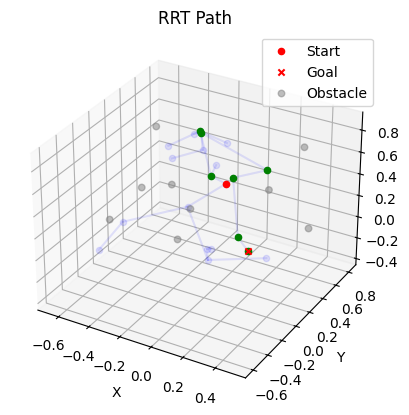

In [12]:
plot_path(vertices, edges, start_node, goal_node, obstacles=obstacles[:-1])

In [13]:
shortest_path = get_shortest_path(edges=edges)

In [14]:
targets = []
for target in shortest_path:
    targets.append(vertices[target])

with open("targets.npy", "wb") as f:
    np.save(f, np.array(targets))